In [2]:
%%time 
import random
from math import exp, sqrt

S0 = 100
r = 0.05
T= 1.0
sigma = 0.2

values = []

for _ in range(1000000):
    ST = S0 *exp((r-0.5* sigma **2)*T + 
                sigma*random.gauss(0, 1)* sqrt(T))
    values.append(ST)

CPU times: user 546 ms, sys: 10.9 ms, total: 557 ms
Wall time: 555 ms


In [6]:
%%time

import numpy as np

S0 = 100
r = 0.05
T= 1.0
sigma = 0.2

values = []

# for _ in range(1000000):
ST = S0 *np.exp((r-0.5* sigma **2)*T + 
                sigma*np.random.standard_normal(1000000)* np.sqrt(T))
    # values.append(ST)

CPU times: user 56.2 ms, sys: 7.08 ms, total: 63.3 ms
Wall time: 73.1 ms


In [7]:
v = [1,2,4,6,8]
sm = [2*i for i in v]
sm

[2, 4, 8, 12, 16]

In [8]:
2*v

[1, 2, 4, 6, 8, 1, 2, 4, 6, 8]

In [9]:
import numpy as np

a = np.array(v)
a

array([1, 2, 4, 6, 8])

In [10]:
type(a)

numpy.ndarray

In [11]:
2*a

array([ 2,  4,  8, 12, 16])

In [13]:
0.5 + 3*a

array([ 3.5,  6.5, 12.5, 18.5, 24.5])

In [22]:
a = np.arange(12).reshape((4,3))
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [16]:
2*a

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [17]:
a**2

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [18]:
a.mean()

5.5

In [19]:
np.mean(a)

5.5

In [20]:
a.mean(axis=1)

array([ 1.,  4.,  7., 10.])

In [24]:
a = np.arange(15).reshape((5,3))
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [25]:
import pandas as pd

In [26]:
columns = list('abc')
columns

['a', 'b', 'c']

In [27]:
index = pd.date_range('2021-7-1', periods=5, freq='B')

In [28]:
index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07'],
              dtype='datetime64[ns]', freq='B')

In [29]:
df = pd.DataFrame(a, columns=columns, index = index)
df


,a,b,c
2021-07-01,0,1,2
2021-07-02,3,4,5
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [30]:
2*df

,a,b,c
2021-07-01,0,2,4
2021-07-02,6,8,10
2021-07-05,12,14,16
2021-07-06,18,20,22
2021-07-07,24,26,28


In [31]:
df.sum()

a    30
b    35
c    40
dtype: int64

In [34]:
np.mean(df, axis=0)

a    6.0
b    7.0
c    8.0
dtype: float64

In [35]:
df['a'] + df['b']

2021-07-01     1
2021-07-02     7
2021-07-05    13
2021-07-06    19
2021-07-07    25
Freq: B, dtype: int64

In [37]:
df['a']>5

2021-07-01    False
2021-07-02    False
2021-07-05     True
2021-07-06     True
2021-07-07     True
Freq: B, Name: a, dtype: bool

In [38]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', 
                  index_col=0, parse_dates=True).dropna()

In [39]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [40]:
data = pd.DataFrame(raw['EUR='])

In [41]:
data.rename(columns= {'EUR=':'price'}, inplace = True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [43]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [44]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [51]:
import seaborn as sns
from pylab import mpl, plt
plt.style.use('ggplot')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'


<Axes: xlabel='Date'>

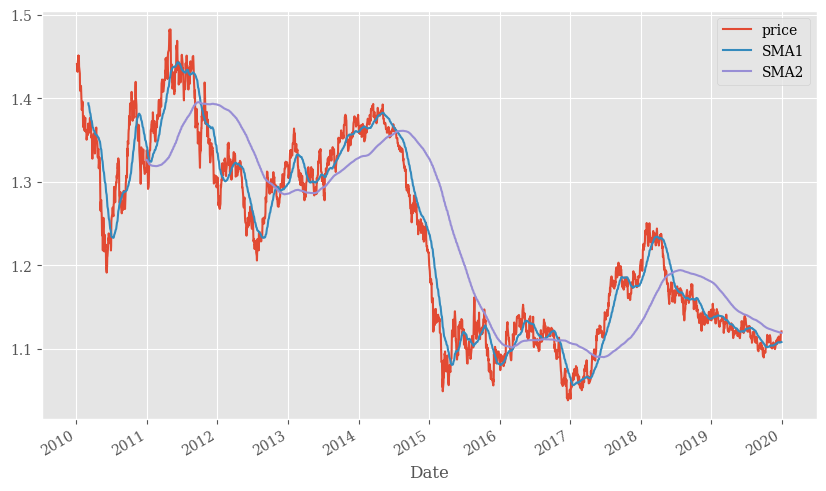

In [52]:
data.plot(figsize = (10,6))

In [53]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [54]:
data.dropna(inplace=True)

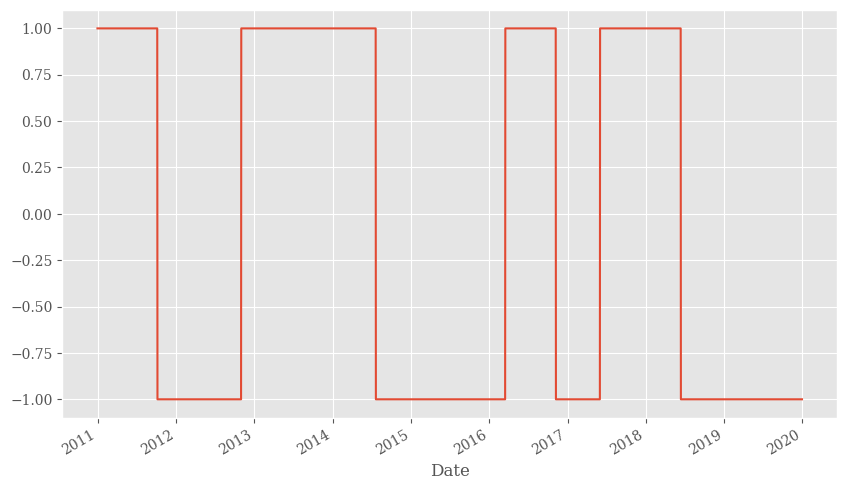

In [56]:
data['position'].plot(figsize= (10,6));

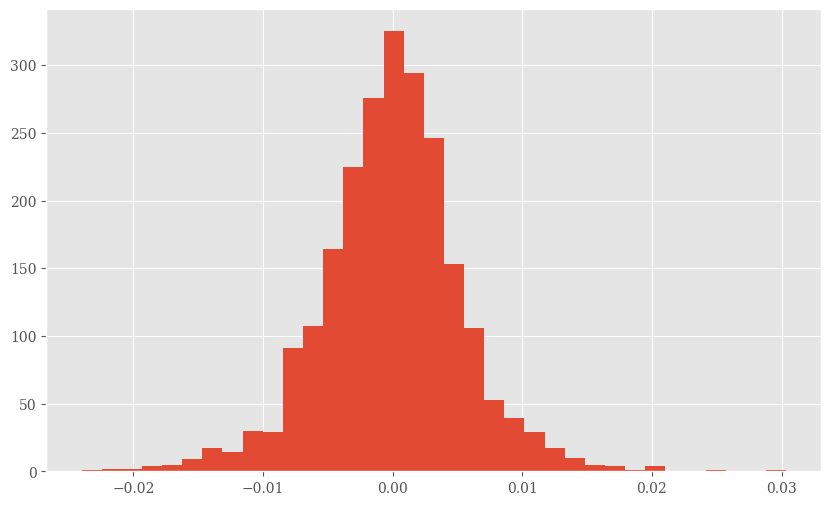

In [57]:
# log return

data['returns'] = np.log(data['price']/data['price'].shift(1))
data['returns'].hist(bins=35, figsize= (10,6));

In [59]:
data['strategy'] = data['position'].shift(1)* data['returns']
data[['returns','strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [60]:
data[['returns','strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

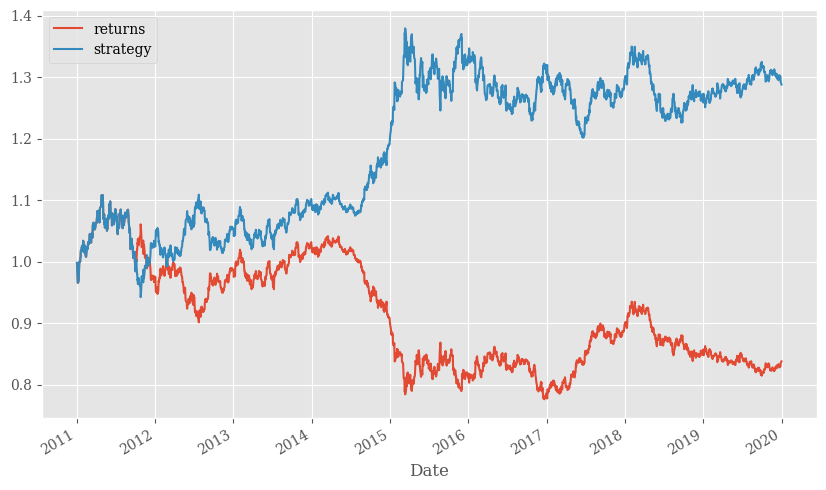

In [62]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6));